1. Import Libraries

In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Define Portfolio Stocks & Weights

In [59]:
stocks = ["INFY.NS", "TCS.NS", "HDFCBANK.NS", "RELIANCE.NS"]
weights = [0.25, 0.25, 0.25, 0.25]

3. Download Price Data

In [60]:

data = yf.download(stocks, start="2020-01-01", end="2025-01-01")
adj_close = data['Close']
adj_close.head()


C:\Users\Asus\AppData\Local\Temp\ipykernel_19940\3939438954.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start="2020-01-01", end="2025-01-01")
[*********************100%***********************]  4 of 4 completed


Ticker,HDFCBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,
2020-01-01,605.529358,642.843933,675.324158,1907.124512
2020-01-02,609.389160,640.968262,686.821289,1898.369751
2020-01-03,600.698853,650.826538,687.648804,1936.202759
2020-01-06,587.698792,644.588745,671.700684,1936.026611
2020-01-07,597.004883,635.035767,682.034607,1940.777710


4. Calculate Daily Returns

In [61]:
daily_returns = adj_close.pct_change()

5. Portfolio Daily Returns

In [62]:
portfolio_daily_returns = (daily_returns * weights).sum(axis=1)

6. Portfolio Performance Metrics

In [63]:
avg_daily_return = portfolio_daily_returns.mean()
volatility = portfolio_daily_returns.std()
sharpe_ratio = (avg_daily_return / volatility) * np.sqrt(252)  # annualized sharpe ratio 

print(f"Average Daily Return: {avg_daily_return:.4f}")
print(f"Volatility: {volatility:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Average Daily Return: 0.0007
Volatility: 0.0130
Sharpe Ratio: 0.86


7. Visualize Portfolio Growth

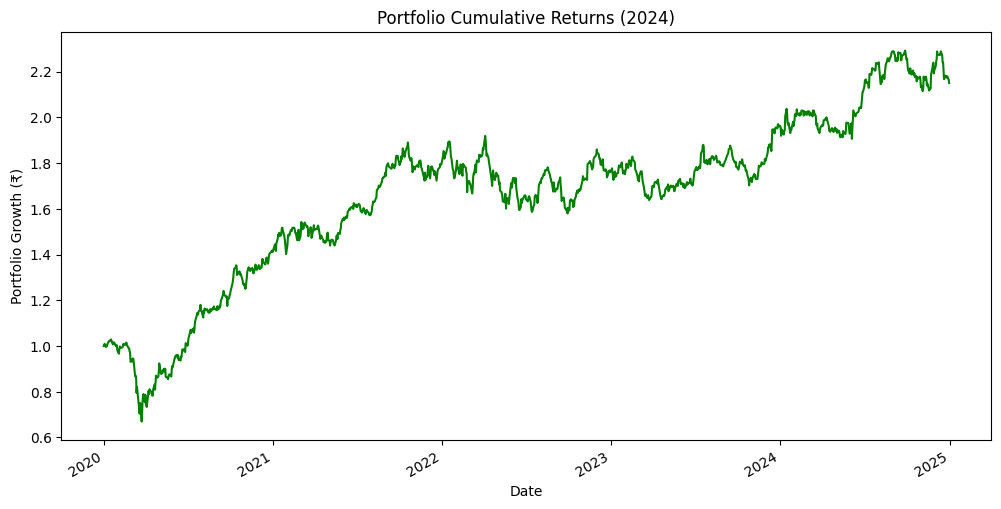

In [64]:
(1 + portfolio_daily_returns).cumprod().plot(figsize=(12,6), color="green")
plt.title("Portfolio Cumulative Returns (2024)")
plt.xlabel("Date")
plt.ylabel("Portfolio Growth (₹)")
plt.show()

8. Data of NIFTY 50 Index for comparison and plotting

In [65]:
nifty = yf.download("^NSEI", start="2020-01-01", end="2025-01-01")["Close"].dropna()

nifty_returns = nifty.pct_change().dropna()
nifty_returns.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_19940\1625367097.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2020-01-01", end="2025-01-01")["Close"].dropna()
[*********************100%***********************]  1 of 1 completed


Ticker,^NSEI
Date,
2020-01-02,0.008184
2020-01-03,-0.004523
2020-01-06,-0.019106
2020-01-07,0.004995
2020-01-08,-0.002290


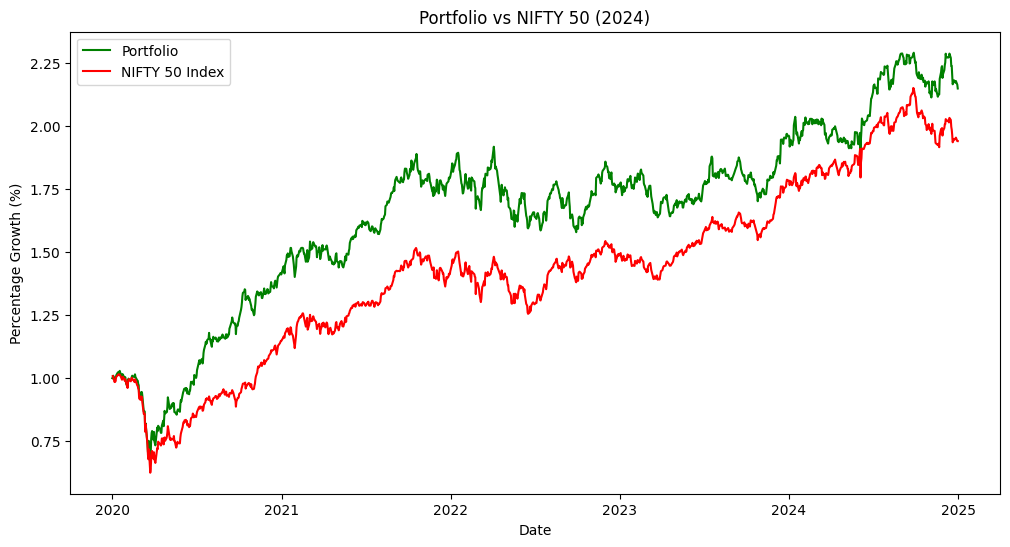

In [ ]:
portfolio_cum = (1 + portfolio_daily_returns).cumprod()
nifty_cum = (1 + nifty_returns).cumprod()

plt.figure(figsize=(12,6))
plt.plot(portfolio_cum, label="Portfolio", color="green")
plt.plot(nifty_cum, label="NIFTY 50 Index", color="red")
plt.title("Portfolio vs NIFTY 50")
plt.xlabel("Date")
plt.ylabel("Percentage Growth (%)")
plt.legend()